In [1]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

In [2]:
path = "dataset/train/"
path_test = "dataset/test/"
files = os.listdir(path)[:31]
files_test = os.listdir(path_test)[:31]
#print("Detected train classes : ",files)
#print("Detected test classes : ",files_test)
print("Detected classes : ",files)

classes={'1':0, '2':1, '3':2, '4':3, '5':4, '6':5, '7':6, '8':7, '9':8, '10':9, '11':10, '12':11, '25':12, '38':13, '51':14,
        '64':15, '77':16, '90':17, '93':18, '105':19, '120':20, '134':21, '149':22, '164':23, '179':24, '190':25, '198':26,
        '208':27, '250':28, '264':29, '274':30 }


Detected classes :  ['1', '10', '105', '11', '12', '120', '134', '149', '164', '179', '190', '198', '2', '208', '25', '250', '264', '274', '3', '38', '4', '5', '51', '6', '64', '7', '77', '8', '9', '90', '93']


In [3]:
print("Importing train data...")
img_train=[]
lbl_train=[]

for cl in classes:
    pth = path+cl
    for img_name in os.listdir(pth):
        img = cv2.imread(pth+"/"+img_name,0)
        img_train.append(img)
        lbl_train.append(classes[cl])

Importing train data...


In [4]:
print("Importing test data...")
img_test=[]
lbl_test=[]

for cl in classes:
    pth = path_test+cl
    for img_name in os.listdir(pth):
        img = cv2.imread(pth+"/"+img_name,0)
        img_test.append(img)
        lbl_test.append(classes[cl])

Importing test data...


In [5]:
print("converting to np array")

img_train = np.array(img_train)
lbl_train = np.array(lbl_train)

img_test = np.array(img_test)
lbl_test = np.array(lbl_test)

save_size = lbl_train.size

print(save_size)

converting to np array
5250


In [6]:
np.save('../app/data/images', img_train)
np.save('../app/data/labels', lbl_train)
np.save('../app/data/size', save_size)
print("Saved processed images")

Saved processed images


1


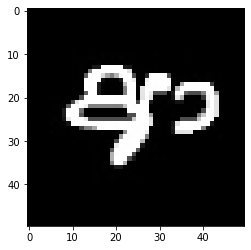

In [7]:
plt.imshow(img_train[257], cmap='gray')
print(lbl_train[257])

In [8]:
print("Reshaping")
img_train = img_train.reshape(img_train.shape[0], img_train.shape[1], img_train.shape[2], 1)
img_test = img_test.reshape(img_test.shape[0], img_test.shape[1], img_test.shape[2], 1)

Reshaping


In [9]:
print("Train shape", img_train.shape)
print("Test shape", img_test.shape)

Train shape (5250, 50, 50, 1)
Test shape (688, 50, 50, 1)


In [10]:
#print("Changing lables to categorical")
#lbl_train = to_categorical(lbl_train, 31)
#lbl_test = to_categorical(lbl_test, 31)

In [11]:
print(lbl_train[2346])
plt.imshow(img_train[2346], cmap='gray')

13


Error in callback <function flush_figures at 0x0000019D5BF285E0> (for post_execute):


KeyboardInterrupt: 

In [12]:
print("Converting to binary")
img_train = img_train / 255
img_test = img_test / 255

Converting to binary


In [13]:
print("Convering to float32")
img_train = img_train.astype('float32')
img_test = img_test.astype('float32')

Convering to float32


In [14]:
epochs = 30
batch = 32

print("Epochs : ",epochs)
print("Batch size : ",batch)

Epochs :  30
Batch size :  32


In [15]:
model = Sequential()
model.add(Conv2D(256, kernel_size=5, activation='relu'))
model.add(MaxPool2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Conv2D(512, kernel_size=5, activation='relu'))
model.add(MaxPool2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Conv2D(1024, kernel_size=5, activation='relu'))
model.add(MaxPool2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(31, activation='softmax'))


In [16]:
model.compile(optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.001),
             loss=tensorflow.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [ ]:
print("Training....")
model.fit(img_train, lbl_train, epochs=epochs, batch_size=batch, validation_data=(img_test, lbl_test))

Training....
Epoch 1/30
 15/165 [=>............................] - ETA: 10:24 - loss: 3.4466 - accuracy: 0.0271

In [ ]:
score = model.evaluate(img_test, lbl_test)

In [ ]:
print('Loss : ', score[0])
print('Accuracy :',score[1])
print(model.summary()) 

In [ ]:
model.save('model.h5')
print("Model saved")